In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import train_test_split

from sklearn import datasets, metrics, model_selection

#from data import *
from helpers import *


In [32]:
# Automated way to create labeled dataset
#directory='/../data_gated/'
#columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
#create_labeled_dataset(directory,columns,label_gated=3,label_not_gated=1)

In [33]:
file = '../labeled_dataset/GL59_DN_2A.csv'
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']
X,y = preprocess(file,columns)

../labeled_dataset/GL59_DN_2A.csv


In [35]:
X

,B530-H,B530-A,B675-H,B572-H,Width
0,-1.373577,-1.353452,0.807877,-0.246186,-1.454233
1,-1.409811,-1.637537,-1.449823,-1.954132,-2.408715
2,-0.853540,-0.882666,1.115025,0.481850,-0.909781
3,1.056561,1.076451,1.629348,1.539202,1.094541
4,-1.398398,-1.556823,-0.008018,-0.390851,-2.156128
...,...,...,...,...,...
14930,0.385149,0.467978,-0.642239,-0.200446,0.760917
14931,1.204131,1.179871,0.148191,0.740113,1.017648
14932,1.321807,1.274453,0.914174,1.196026,1.033148
14933,1.158095,1.142541,1.415190,1.402863,1.048587


In [37]:
def proportional_train_test_split(X, y, test_size=0.2, random_state=0):
    #find all y==1 and y==0
    X['y'] = y.copy()
    X_1 = X[X['y']==1]
    y_1 = X_1['y']
    X_1 = X_1.drop(['y'],axis=1)
    X_not1 = X[X['y']!=1]
    y_not1 = X_not1['y']
    X_not1 = X_not1.drop(['y'],axis=1)
    
    #split in each sample
    X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=test_size, random_state=random_state)
    X_not1_train, X_not1_test, y_not1_train, y_not1_test = train_test_split(X_not1, y_not1, test_size=test_size, random_state=random_state)
    
    #merge them together
    X_final_train = X_1_train.append(X_not1_train, ignore_index = True)
    X_final_test = X_1_test.append(X_not1_test, ignore_index = True)
    y_final_train = y_1_train.append(y_not1_train, ignore_index = True)
    y_final_test = y_1_test.append(y_not1_test, ignore_index = True)
    
    return X_final_train, X_final_test, y_final_train, y_final_test



In [38]:
X_train, X_test, y_train, y_test = proportional_train_test_split(X,y)

In [4]:
X.shape

(14690, 4)

In [5]:
X.head()

,B530-H,B572-H,B675-H,Width
0,-1.373577,-0.246186,0.807877,-1.454233
1,-1.409811,-1.954132,-1.449823,-2.408715
2,-0.853540,0.481850,1.115025,-0.909781
3,1.056561,1.539202,1.629348,1.094541
4,-1.398398,-0.390851,-0.008018,-2.156128


In [35]:
kfold_cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


# Example for a training-test split
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.988 (0.002)
Balanced Accuracy: 0.987 (0.002)
F1: 0.984 (0.003)
AUC: 0.987 (0.002)
Accuracy: 0.990
Balanced Accuracy: 0.989
F1: 0.986
AUC: 0.989


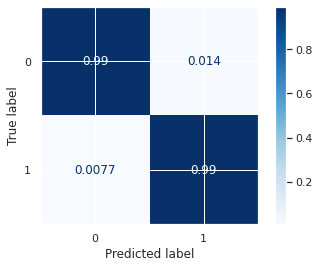

In [39]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

In [27]:
file = '../labeled_dataset/GL55_DN_3A.csv'
columns=['B530-H', 'B572-H', 'B675-H','Width']
X_file,y_file = preprocess(file,columns)

../labeled_dataset/GL55_DN_3A.csv


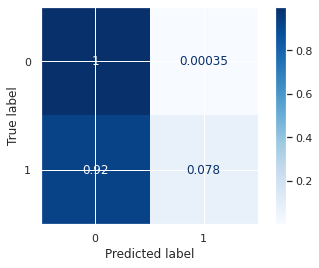

In [12]:
y_pred_file = model.predict(X_file)
metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

In [13]:
print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))

Accuracy: 0.992
Balanced Accuracy: 0.539
F1: 0.996


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state= 0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [41]:
forest.feature_importances_

array([0.43115117, 0.10881407, 0.30167703, 0.15835774])

In [42]:
forest.predict(X_test)

array([2, 2, 1, ..., 1, 2, 2])

In [43]:
forest.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [44]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=kfold_cv, scoring='roc_auc')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))


# Example for a training-test split
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.993 (0.001)
Balanced Accuracy: 0.992 (0.001)
F1: 0.990 (0.002)
F1: 1.000 (0.000)
Accuracy: 0.994
Balanced Accuracy: 0.993
F1: 0.991
AUC: 0.993


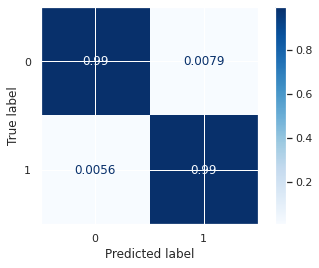

In [45]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

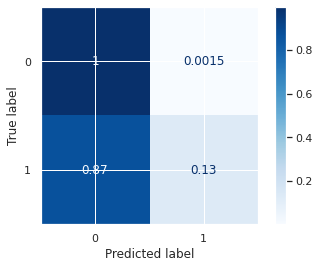

In [28]:
y_pred_file = model.predict(X_file)
metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

In [29]:
print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))

Accuracy: 0.992
Balanced Accuracy: 0.562
F1: 0.996


### SVM

In [22]:
from sklearn import svm
svmsvc = svm.SVC(max_iter=1000, random_state=0)
svmsvc.fit(X_train, y_train)

/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=1000, random_state=0)

In [47]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X, y, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X, y, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X, y, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(svm.SVC(max_iter=1000, random_state=0), X, y, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

# Example for a training-test split
model = svm.SVC(max_iter=1000, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

Accuracy: 0.767 (0.054)


/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

Balanced Accuracy: 0.670 (0.078)


/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

F1: 0.489 (0.169)


/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

AUC: 0.963 (0.005)


/home/mika/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Accuracy: 0.873
Balanced Accuracy: 0.819
F1: 0.777
AUC: 0.819


In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([-1,1],[-1,1], 'red', linestyle='--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid()
plt.show()

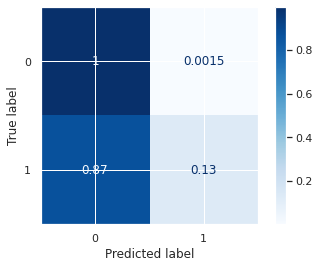

In [24]:
y_pred_file = model.predict(X_file)
metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

In [25]:
print("Accuracy: %.3f" % (metrics.accuracy_score(y_file, y_pred_file)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_file, y_pred_file)))
print("F1: %.3f" % (metrics.f1_score(y_file, y_pred_file)))

Accuracy: 0.992
Balanced Accuracy: 0.562
F1: 0.996


In [26]:
labels_true = y.to_list()
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("F1-score: %0.3f"
      % f1_score(labels_true, labels, average='micro'))
print("Rand Index: %0.3f"
      % metrics.rand_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

NameError: name 'n_clusters_' is not defined

In [ ]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)